In [1]:
using PyPlot; plt=PyPlot
using Polynomials
using Polynomials.PolyCompat

In [2]:
include("DeC.jl")

dec_stiff_subtimesteps (generic function with 1 method)

In [3]:
# Nonlinear_oscillator
function nonLinearOscillator_flux(u,alpha=0.)
    ff=zeros(size(u))
    n=sqrt(u'*u)
    ff[1]=-u[2]/n-alpha*u[1]/n
    ff[2]=u[1]/n - alpha*u[2]/n
    return ff
end

function nonLinearOscillator_exact_solution(u0,t)
    # this has to be fixed for speed...
    n=sqrt(sum(u0.*u0))
    a=[cos.(t/n)*u0[1]-sin.(t/n)*u0[2];sin.(t/n)*u0[1]+cos.(t/n)*u0[2]]
    return a
end


# SIR Model
function nonLinearOscillatorDamped_flux(u,alpha=0.01)
    ff=zeros(size(u))
    n=sqrt(u'*u)
    ff[1]=-u[2]/n-alpha*u[1]
    ff[2]=u[1]/n - alpha*u[2]
    return ff
end

function nonLinearOscillatorDamped_exact_solution(u0,t, alpha=0.01)
    # this has to be fixed for speed...
    n0=sqrt(sum(u0.*u0))
    n=n0*exp.(-alpha.*t)
    theta=1.0/alpha/n0*(exp.(alpha*t)-1.0)
    a=n/n0.*[cos.(theta)*u0[1]-sin.(theta)*u0[2];sin.(theta)*u0[1]+cos.(theta)*u0[2]]
    return a
end


function setup(problem)
    
    if problem == "nonLinearOscillator"
        u0 = [1.0;0.0]
        T_fin = 100.0
        flux = nonLinearOscillator_flux
        exact_solution = nonLinearOscillator_exact_solution
    elseif problem == "nonLinearOscillatorDamped"
        u0 = [1.0;0.0]
        T_fin = 100.0
        flux = nonLinearOscillatorDamped_flux
        exact_solution = nonLinearOscillatorDamped_exact_solution
    end
    
    return u0, T_fin, flux, exact_solution
end


setup (generic function with 1 method)

## Nonlinear Oscillator

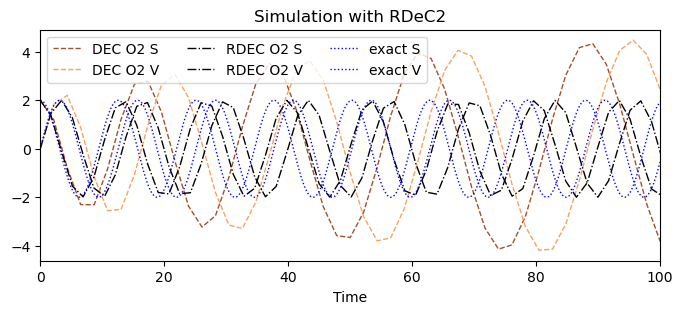

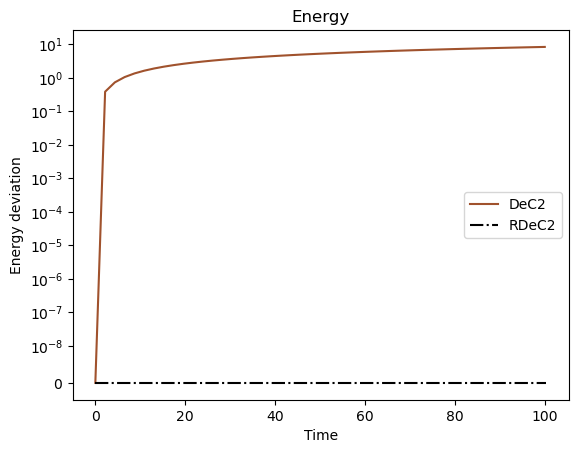

In [4]:
u0, T_fin , flux , exact_solution = setup("nonLinearOscillator")
u0=2*u0
anal_l = 2000
t_ex = range(0,stop=T_fin,length=anal_l)
u_ex = zeros(length(u0),length(t_ex))
for k = 1:anal_l
    u_ex[:,k] = exact_solution(u0,t_ex[k])
end

N = 47
order=2
dt0=T_fin/N
plt.figure(figsize=(8,3))
tt = range(0,stop=T_fin,length=N)
t3,U3=dec(flux, tt, u0, order-1,order,"gaussLobatto")
t4,U4,gammas=energy_relaxed_dec_dissipative(flux, 0, T_fin, dt0, u0,order-1,order,"gaussLobatto")

plt.plot(t3,U3[1,:],"--",linewidth=1,color="sienna",label="DEC O$(order) S")
plt.plot(t3,U3[2,:],"--",linewidth=1,color="sandybrown",label="DEC O$(order) V")

plt.plot(t4[1,:],U4[1,:],"k-.",linewidth=1,label="RDEC O$(order) S")
plt.plot(t4[1,:],U4[2,:],"k-.",linewidth=1,label="RDEC O$(order) V")

plt.plot(t_ex,u_ex[1,:],"b:",linewidth=1,label="exact S")
plt.plot(t_ex,u_ex[2,:],"b:",linewidth=1,label="exact V")
plt.legend(loc="best",ncol=3)
plt.xlim([0,T_fin])
plt.xlabel("Time")
plt.title("Simulation with RDeC$(order)")
plt.savefig("Oscillator_Simulation_RDeC$(order)_N$(N).pdf", bbox_inches="tight")
plt.show()



plt.figure()
plt.plot(t3,[0.5*(U3[:,k]'*U3[:,k]-U3[:,1]'*U3[:,1]) for k in 1:length(t3)],"sienna", label="DeC$(order)")
plt.plot(t4[1,:],[0.5*(U4[:,k]'*U4[:,k]-U4[:,1]'*U4[:,1]) for k in 1:length(t4)],"k-.", label="RDeC$(order)")
plt.xlabel("Time")
plt.yscale("symlog",linthreshy=1e-8)
plt.ylabel("Energy deviation")
plt.title("Energy")
plt.legend()
plt.savefig("Oscillator_Energy_RDeC$(order)_N$(N).pdf", bbox_inches="tight")


plt.figure()
plt.plot(t4[1,:],gammas[1,:],label="Relaxed DeC$(order)")
plt.xlabel("Time")
plt.ylabel(L"\gamma")
plt.title("Relaxation gamma")
plt.savefig("Pendolum_Gamma_RDeC$(order)_N$(N).pdf", bbox_inches="tight")
plt.show()

plt.figure()
plt.plot(U3[1,:],U3[2,:],"o",linewidth=1,color="sienna",label="DeC$(order)")
plt.plot(U4[1,:],U4[2,:],"k.",linewidth=1,label="RDeC$(order)")
plt.plot(u_ex[1,:],u_ex[2,:], "c:", label="exact")
plt.xlabel("S")
plt.ylabel("V")
plt.title("Phase Space")
plt.legend(loc="best")
plt.savefig("Oscillator_Phase_RDeC$(order)_N$(N).pdf", bbox_inches="tight")
plt.show()

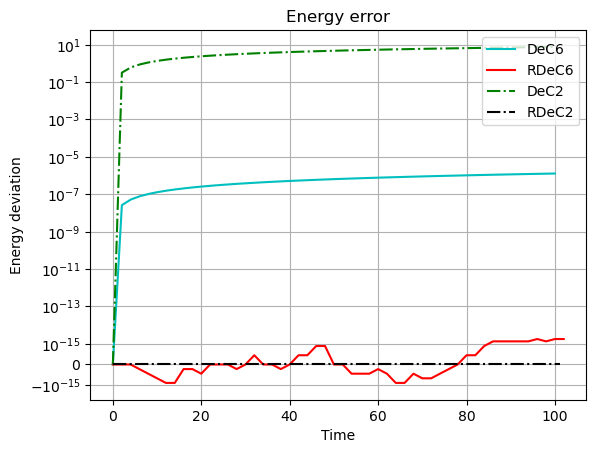

In [5]:
order1=6; N1=50; order2=2; N2=50;
dt1=T_fin/N1; dt2=T_fin/N2;
tt1 = range(0,stop=T_fin,length=N1);
tt2 = range(0,stop=T_fin,length=N2);
t1,U1=dec(flux, tt1, u0, order1-1,order1,"gaussLobatto")
t2,U2,gammas2=energy_relaxed_dec_dissipative(flux, 0, T_fin, dt1, u0,order1-1,order1,"gaussLobatto")
t3,U3=dec(flux, tt2, u0, order2-1,order2,"gaussLobatto")
t4,U4,gammas4=energy_relaxed_dec_dissipative(flux, 0, T_fin, dt2, u0,order2-1,order2,"gaussLobatto")

plt.figure()
plt.plot(t2[1,:],gammas2[1,:].-1,"r-",label="RDeC$(order1)")
plt.plot(t4[1,:],gammas4[1,:].-1,"k-.",label="RDeC$(order2)")
plt.ylabel(L"\gamma-1")
plt.yscale("symlog",linthreshy=1e-10)
plt.legend()
plt.grid(true)
plt.xlabel("Time")
plt.title(L"Relaxation \gamma")
plt.savefig("Oscillator_gammas_comparison.pdf", bbox_inches="tight")

plt.figure()
plt.plot(t1,[0.5*(U1[:,k]'*U1[:,k]-U1[:,1]'*U1[:,1]) for k in 1:length(t1)],"c-", label="DeC$(order1)")
plt.plot(t2[1,:],[0.5*(U2[:,k]'*U2[:,k]-U2[:,1]'*U2[:,1]) for k in 1:length(t2)],"r-", label="RDeC$(order1)")
plt.plot(t3, [0.5*(U3[:,k]'*U3[:,k]-U3[:,1]'*U3[:,1]) for k in 1:length(t3)],"g-.", label="DeC$(order2)")
plt.plot(t4[1,:],[0.5*(U4[:,k]'*U4[:,k]-U4[:,1]'*U4[:,1]) for k in 1:length(t4)],"k-.", label="RDeC$(order2)")
plt.xlabel("Time")
plt.yscale("symlog",linthreshy=1e-15)
plt.ylabel("Energy deviation")
plt.legend()
plt.title("Energy error")
plt.grid(true)
plt.savefig("Oscillator_Energy_comparison.pdf", bbox_inches="tight")


In [6]:
function compute_error(t,u,u0)
    error=0
    it=0
    for tt in t[1,:]
        it=it+1
        exSol=exact_solution(u0,tt)
        error=error+ norm(exSol-u[:,it])
    end
    error = error/it
    return error
end

nodes="gaussLobatto"
NN=10
dts=[2.9/2.0^k for k in 1:NN]
errorsDeC=zeros(size(dts))
errorsRelaxedDeC=zeros(size(dts))
errorsRelaxedADER=zeros(size(dts))
t_init=0
t_end=T_fin
y_0=u0
for order=2:8
    #plt.figure()
    for k=1:NN
        dt0=order*dts[k]
        t2,U2,gammas=energy_relaxed_dec_dissipative(flux, t_init, t_end, dt0, y_0, order-1, order, nodes)
        tspan1=t2
        t1,U1 = dec(flux, tspan1, y_0, order-1,order,  nodes)
        errorsDeC[k]=compute_error(t2,U1,y_0)
        errorsRelaxedDeC[k]=compute_error(t2,U2,y_0)
    end
    plt.show()
    plt.loglog(order*dts,errorsDeC,"--",label="DeC$(order)")
    plt.loglog(order*dts,errorsRelaxedDeC,".-",label="RDeC$(order)")
    plt.loglog(order*dts[2:4], dts[2:4].^order/dts[2]^order*errorsRelaxedDeC[2]*1.5, ":", linewidth=1,color="grey")
    plt.text(order*dts[4],dts[4].^order/dts[2]^order*errorsRelaxedDeC[2]*1.5, "order $(order)",color="grey",ha="right")
end
plt.title("Error Convergence Oscillator")
plt.grid(true)
plt.xlabel(L"\Delta t")
plt.ylabel("Error")
plt.legend(loc="best")
plt.xlim([10^-3,10^1])
plt.savefig("Oscillator_convergence_$(nodes).pdf")
plt.show()

## Damped nonlinear oscillator

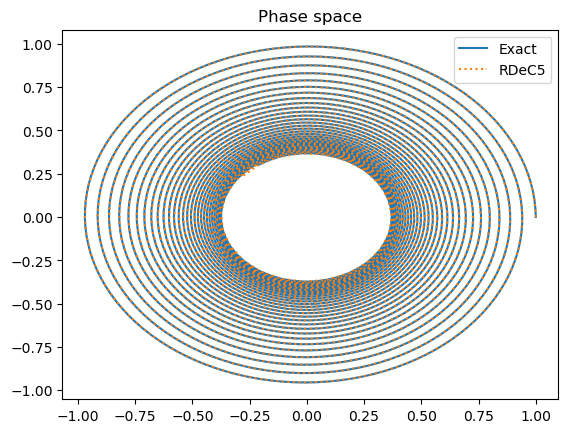

PyObject Text(0.5, 1.0, 'Phase space')

In [7]:
u0, T_fin , flux , exact_solution = setup("nonLinearOscillatorDamped")
T_fin=100
u0=u0
anal_l = 2000
t_ex = range(0,stop=T_fin,length=anal_l)
u_ex = zeros(length(u0),length(t_ex))
for k = 1:anal_l
    u_ex[:,k] = exact_solution(u0,t_ex[k])
end
plt.plot(u_ex[1,:],u_ex[2,:], label="Exact")

dt0=0.1
tt = range(0,stop=T_fin,length=N)
t4,U4,gammas=energy_relaxed_dec_dissipative(flux, 0, T_fin, dt0, u0, 4, 5,"gaussLobatto")
plt.plot(U4[1,:],U4[2,:], ":", label="RDeC5")
plt.legend()
plt.title("Phase space")

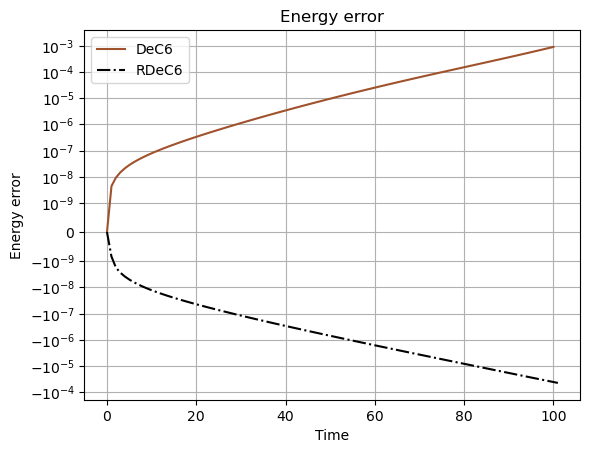

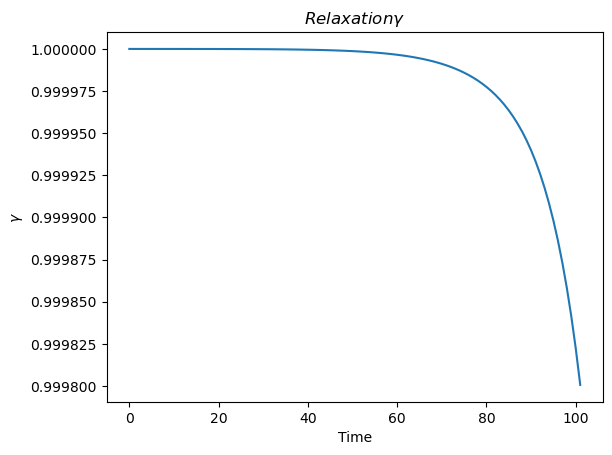

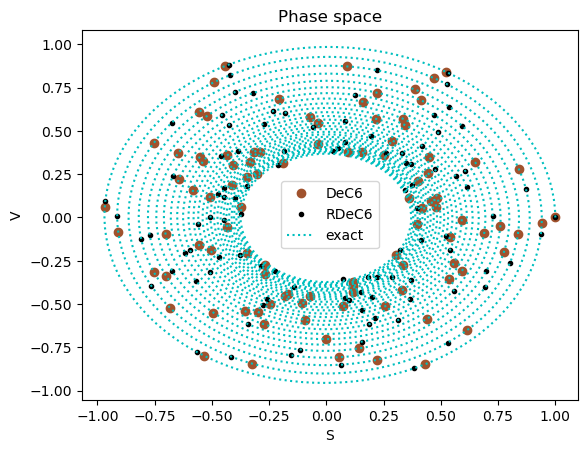

In [8]:
N = 100
order=6
dt0=T_fin/N
plt.figure(figsize=(8,3))
tt = range(0,stop=T_fin,length=N)

t3,U3=dec(flux, tt, u0, order-1,order,"gaussLobatto")
t4,U4,gammas=energy_relaxed_dec_dissipative(flux, 0, T_fin, dt0, u0,order-1,order,"gaussLobatto")

plt.plot(t3,U3[1,:],"--",linewidth=1,color="sienna",label="DEC O$(order) S")
plt.plot(t3,U3[2,:],"--",linewidth=1,color="sandybrown",label="DEC O$(order) V")
plt.plot(t4[1,:],U4[1,:],"k-.",linewidth=1,label="RDEC O$(order) S")
plt.plot(t4[1,:],U4[2,:],"k-.",linewidth=1,label="RDEC O$(order) V")

plt.plot(t_ex,u_ex[1,:],"b:",linewidth=1,label="exact S")
plt.plot(t_ex,u_ex[2,:],"b:",linewidth=1,label="exact V")

plt.legend(loc="best",ncol=3)
plt.xlim([0,T_fin])
plt.ylim([-1,1.5])
plt.xlabel("Time")
plt.title("Simulation")
plt.savefig("DampedOscillator_Simulation_RDeC$(order)_N$(N).pdf", bbox_inches="tight")
plt.show()

plt.figure()
plt.plot(t3,[U3[:,k]'*U3[:,k]-exp.(-2*0.01*t3[k]) for k in 1:length(t3)],"sienna", label="DeC$(order)")
plt.plot(t4[1,:],[U4[:,k]'*U4[:,k]-exp.(-2*0.01*t4[1,k]) for k in 1:length(t4)],"k-.", label="RDeC$(order)")
plt.xlabel("Time")
plt.yscale("symlog",linthreshy=1e-9)
plt.grid(true)
plt.ylabel("Energy error")
plt.title("Energy error")
plt.legend()
plt.savefig("DampedOscillator_EnergyError_RDeC$(order)_N$(N).pdf", bbox_inches="tight")


plt.figure()
plt.plot(t4[1,:],gammas[1,:],label="Relaxed DeC$(order)")
plt.xlabel("Time")
plt.ylabel(L"\gamma")
plt.title(L"Relaxation \gamma")
plt.savefig("DampedOscillator_Gamma_RDeC$(order)_N$(N).pdf", bbox_inches="tight")
plt.show()

plt.figure()
plt.plot(U3[1,:],U3[2,:],"o",linewidth=1,color="sienna",label="DeC$(order)")
plt.plot(U4[1,:],U4[2,:],"k.",linewidth=1,label="RDeC$(order)")
plt.plot(u_ex[1,:],u_ex[2,:], "c:", label="exact")
plt.xlabel("S")
plt.ylabel("V")
plt.title("Phase space")
plt.legend(loc="best")
plt.savefig("DampedOscillator_Phase_RDeC$(order)_N$(N).pdf", bbox_inches="tight")
plt.show()

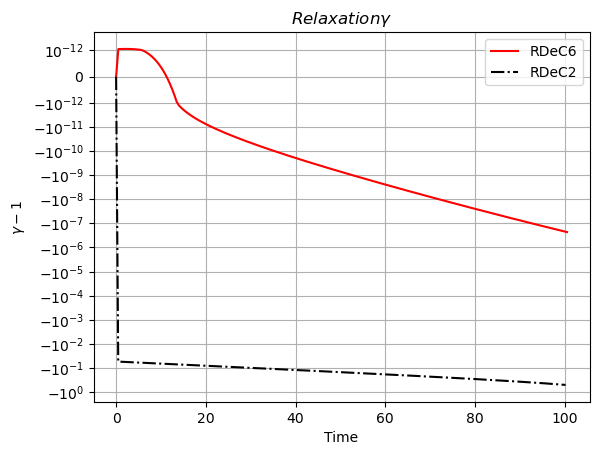

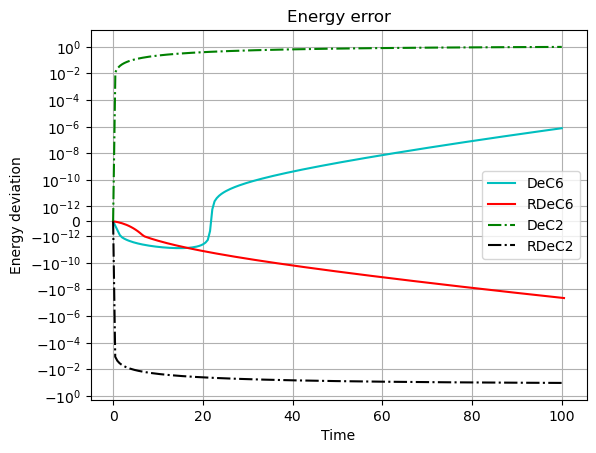

In [9]:
order1=6; N1=200; order2=2; N2=200;
dt1=T_fin/N1; dt2=T_fin/N2;
tt1 = range(0,stop=T_fin,length=N1);
tt2 = range(0,stop=T_fin,length=N2);
t1,U1=dec(flux, tt1, u0, order1-1,order1,"gaussLobatto")
t2,U2,gammas2=energy_relaxed_dec_dissipative(flux, 0, T_fin, dt1, u0,order1-1,order1,"gaussLobatto")
t3,U3=dec(flux, tt2, u0, order2-1,order2,"gaussLobatto")
t4,U4,gammas4=energy_relaxed_dec_dissipative(flux, 0, T_fin, dt2, u0,order2-1,order2,"gaussLobatto")

plt.figure()
plt.plot(t2[1,:],gammas2[1,:].-1,"r-",label="RDeC$(order1)")
plt.plot(t4[1,:],gammas4[1,:].-1,"k-.",label="RDeC$(order2)")
plt.ylabel(L"\gamma-1")
plt.yscale("symlog",linthreshy=1e-12)
plt.legend()
plt.grid(true)
plt.xlabel("Time")
plt.title(L"Relaxation \gamma")
plt.savefig("DampedOscillator_gammas_comparison.pdf", bbox_inches="tight")

plt.figure()
plt.plot(t1,[U1[:,k]'*U1[:,k]-exp(-2*0.01*t1[k]) for k in 1:length(t1)],"c-", label="DeC$(order1)")
plt.plot(t2[1,:],[U2[:,k]'*U2[:,k]-exp(-2*0.01*t2[1,k]) for k in 1:length(t2)],"r-", label="RDeC$(order1)")
plt.plot(t3,[U3[:,k]'*U3[:,k]-exp(-2*0.01*t3[k]) for k in 1:length(t3)],"g-.", label="DeC$(order2)")
plt.plot(t4[1,:],[U4[:,k]'*U4[:,k]-exp(-2*0.01*t4[1,k]) for k in 1:length(t4)],"k-.", label="RDeC$(order2)")
plt.xlabel("Time")
plt.title("Deviation from initial energy")
plt.yscale("symlog",linthreshy=1e-12)
plt.ylabel("Energy deviation")
plt.legend()
plt.title("Energy error")
plt.grid(true)
plt.savefig("DampedOscillator_Energy_comparison.pdf", bbox_inches="tight")


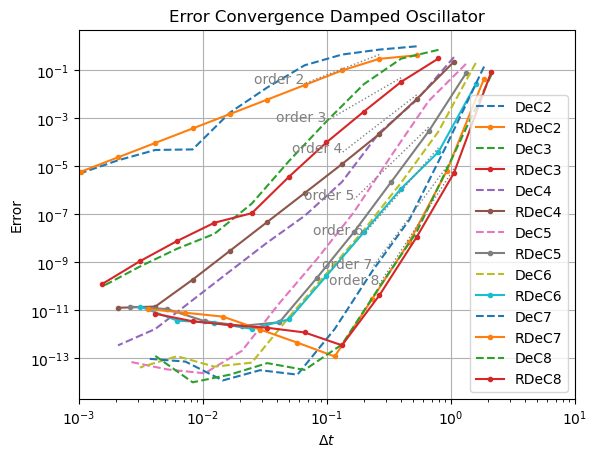

In [10]:
function compute_error(t,u,u0)
    error=0
    it=0
    for tt in t[1,:]
        it=it+1
        exSol=exact_solution(u0,tt)
        error=error+ norm(exSol-u[:,it])
    end
    error = error/it
    return error
end

nodes="equispaced"
NN=10
dts=[0.53/2.0^k for k in 1:NN]
errorsDeC=zeros(size(dts))
errorsRelaxedDeC=zeros(size(dts))
errorsRelaxedADER=zeros(size(dts))
t_init=0
t_end=T_fin
y_0=u0
for order=2:8
    for k=1:NN            
        dt0=order*dts[k]
        t2,U2,gammas=energy_relaxed_dec_dissipative(flux, t_init, t_end, dt0, y_0, order-1, order, nodes)
        tspan1=t2
        t1,U1 = dec(flux, tspan1, y_0, order-1,order,  nodes)
        errorsDeC[k]=compute_error(t2,U1,y_0)
        errorsRelaxedDeC[k]=compute_error(t2,U2,y_0)
    end
    plt.show()
    plt.loglog(order*dts,errorsDeC,"--",label="DeC$(order)")
    plt.loglog(order*dts,errorsRelaxedDeC,".-",label="RDeC$(order)")
    plt.loglog(order*dts[2:4], dts[2:4].^order/dts[2]^order*errorsRelaxedDeC[2]*1.5, ":", linewidth=1,color="grey")
    plt.text(order*dts[4],dts[4].^order/dts[2]^order*errorsRelaxedDeC[2]*1.5, "order $(order)",color="grey",ha="right")
end
plt.title("Error Convergence Damped Oscillator")
plt.grid(true)
plt.xlabel(L"\Delta t")
plt.ylabel("Error")
plt.legend(loc="best")
plt.xlim([10^-3,10^1])
plt.savefig("DampedOscillator_convergence_$(nodes).pdf")
plt.show()